In [1]:
import json
with open('lmg_pretrained_pipeline_v2.json', 'r') as f:
    data = json.load(f)

In [14]:
import matplotlib.pyplot as plt
from statistics import mean, stdev

bce_weights = sorted([i['parameters']['bce_weight'] for i in data])

def statistics_per_key(list_of_dict):
    keys = list_of_dict[0].keys()
    result = {}
    for key in keys:
        result[key] = [mean([i[key] for i in list_of_dict]), stdev([i[key] for i in list_of_dict])]
    return result

result = []
for bce in bce_weights:
    trials = sum([i['trials'] for i in data if i['parameters']['bce_weight'] == bce], [])
    datas = []
    for trial in trials:
        last_epoch = trial[-1]
        datas.append(last_epoch['data'])
    result.append({'bce_weight': bce, 'statistics': statistics_per_key(datas)})
    


sensitivity
[0.48197767734527586, 0.5352471947669983, 0.48612440228462217, 0.48229665160179136, 0.5496012806892395]
[0.07771254094341654, 0.029247984532339857, 0.0682310061735603, 0.045581684901028915, 0.046629914627905326]
specificity
[0.9807823061943054, 0.9818102598190308, 0.9857130289077759, 0.9837965130805969, 0.9770886063575744]
[0.007608182726022155, 0.004131069705039514, 0.004288609145270019, 0.004007315506128577, 0.006961893516064719]
accuracy
[0.9549479484558105, 0.9586816549301147, 0.9598381042480468, 0.957822573184967, 0.9549479603767395]
[0.003656379060142874, 0.002438151903816848, 0.0006053191003040617, 0.002189863880519187, 0.004858405590433821]
precision
[0.5874154329299927, 0.6202946782112122, 0.6564413785934449, 0.6229495882987977, 0.5765317559242249]
[0.047616626167721395, 0.04028793392477862, 0.0400128022224277, 0.037390776894537944, 0.0713189056474445]
mcc
[0.5062833019606088, 0.5540017489407899, 0.5426067564432655, 0.5256664860409082, 0.5373781963474237]
[0.024139

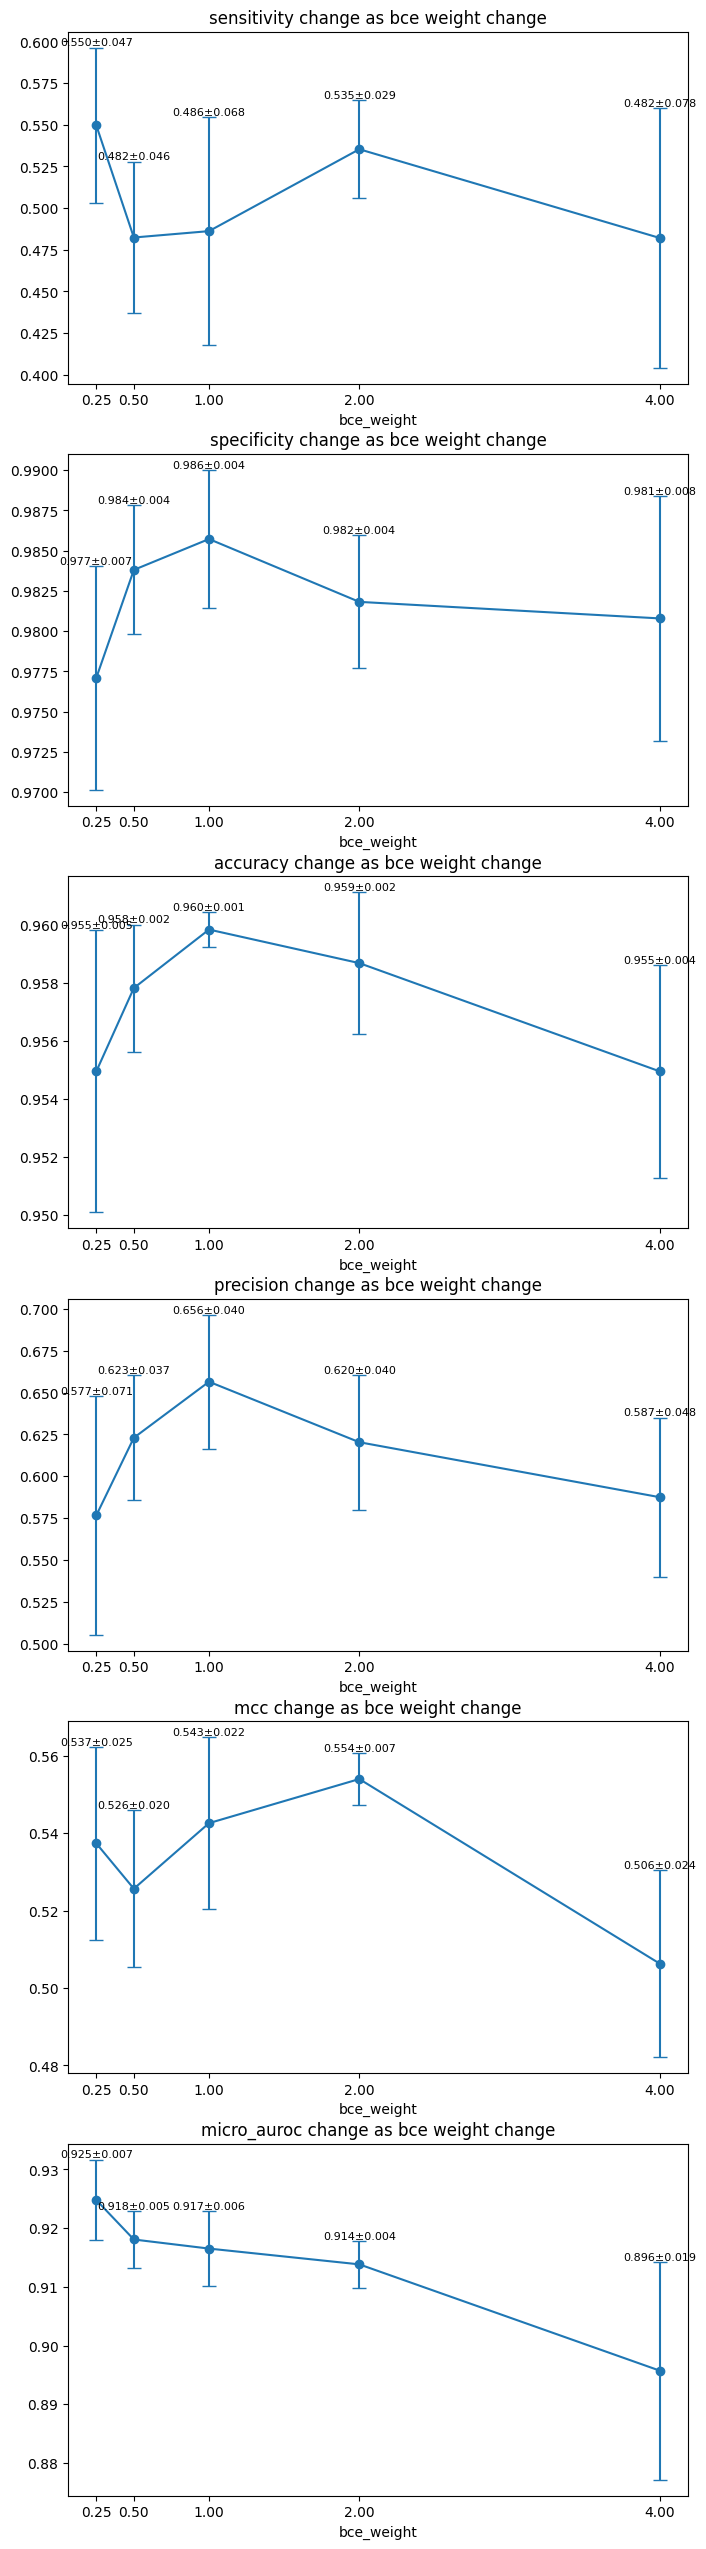

In [18]:
import matplotlib.pyplot as plt

bce_weights = [i['parameters']['bce_weight'] for i in data]

metrics = ['sensitivity', 'specificity', 'accuracy', 'precision', 'mcc', 'micro_auroc']

fig, axs = plt.subplots(6, figsize=(8, 32))

for metric, ax in zip(metrics, axs):
    print(metric)
    metric_avg = [i['statistics'][metric][0] for i in result]
    metric_std = [i['statistics'][metric][1] for i in result]
    print(metric_avg)
    print(metric_std)
    ax.errorbar(bce_weights, metric_avg, yerr=metric_std, fmt='-o', capsize=5)
    ax.set_title(f'{metric} change as bce weight change')
    ax.set_xlabel('bce_weight')
    ax.set_xticks(bce_weights)

    for weight, avg, std in zip(bce_weights, metric_avg, metric_std):
        ax.text(weight, avg+std, f'{avg:.3f}±{std:.3f}', ha='center', va='bottom', fontsize=8)